### Create noisy signal and filter it - EXAMPLE2 for LAB2

#### There are two parts

<ul>
  <li>Part1 - create noisy signal</li>
  <li>Part2 - flter the signal</li>
</ul>

#### Part 1 - create noisy signal and play it as audio

Creates two wave files. The first is pure sine wave of a given frequency,
and the second is a sine wave with random gaussion signal (noise) added to it.
The two wave files are played as audio signals.

#### Part 2 - remove noise from the signal (filter using fft)

Use fft methods from scipy.fftpack to flter the noisy signal to remove noise

> **NOTE:** This program uses the MAC OS command "afplay" to play the wave files.
> This may not work on all systems including Windows if afplay is not available on the OS.
> The program also creates wave files in a local folder. On you system set the absolute path of
> the folder in the DPATH variable below
> Windows example: DPATH = r'C:\myhome\PHY327L\DATA\'

[MarkdownLink] <https://www.markdownguide.org/basic-syntax/>

In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import fftpack as ft
import subprocess
import os
import wave
import matplotlib.pyplot as plt

In [ ]:
# Play a wave file (optional, only works on Mac)
#def playWave(wfile):
    # runs the os command "afplay" to play wfile. Wfile can be a wav or MP3 file
 #   return_code = subprocess.call(["afplay", wfile])

#### Part 1 - create noisy signal

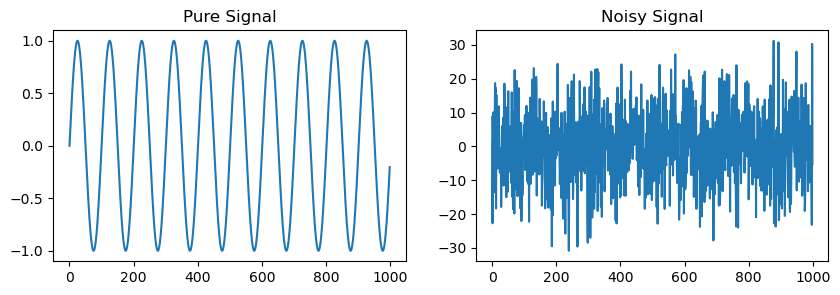

In [3]:
# constants defining the sine wave frequency, sample-rate, and sound file duration in seconds
sampleRate = 44100
# frequency Hz
frequency440 = 440
frequency880 = 880

# audio duration in secondss
length = 5

# define the directory path where wav file will be stored
#FPATH = os.getcwd()
#DPATH = FPATH + '/../../DATA/'
#DPATH = r"C:\\Users\\dhick\\OneDrive\\Documents\\AugsburgUniversity\\PHY327L_S24\\DATA\\"

# create sine signal
t = np.linspace(0, length, sampleRate * length)  #  Produces a 5 second Audio-File
signal440 = np.sin(frequency440 * 2 * np.pi * t)  #  Has frequency of 440Hz
signal880 = np.sin(frequency880 * 2 * np.pi * t)

# write and play file (optional, requires some editing)
#soundwave = np.around((signal440+1)*255/2)
#soundwave = soundwave.astype(int)

#SFILE = DPATH + 'Sine.wav'
#with wave.open(SFILE, mode="wb") as wav_file:
#    wav_file.setnchannels(1)
#    wav_file.setsampwidth(1)
#    wav_file.setframerate(sampleRate)
#    wav_file.writeframes(bytes(signal440.astype(int)))
#wavfile.write(SFILE, sampleRate, signal440)
#playWave(SFILE)

# generate Gaussian noise
sdev = .1 # standard deviation
m = 0 # mean

# create noisy signal
noise = np.random.normal(m, sdev, signal440.size)
signalNoisy440 = signal440 + noise*100
# signalNoisy880 = signal880 + noise
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(signal440[0:1000])
plt.title('Pure Signal')
plt.subplot(1,2,2)
plt.plot(signalNoisy440[0:1000])
_=plt.title('Noisy Signal')

In [7]:

###optional: use this section to generate a .wav file that could be played on your computer.
###Note that you will need to edit some of this code in order to use it effectively.
import math
FRAMES_PER_SECOND = 44100

def sound_wave(frequency, num_seconds):
    for frame in range(round(num_seconds * FRAMES_PER_SECOND)):
        time = frame / FRAMES_PER_SECOND
        amplitude = math.sin(2 * math.pi * frequency * time)
        yield round((amplitude + 1) / 2 * 255)

def noisy_wave(frequency, num_seconds):
    for frame in range(round(num_seconds * FRAMES_PER_SECOND)):
        time = frame / FRAMES_PER_SECOND
        amplitude = math.sin(2 * math.pi * frequency * time)+np.random.normal(0, 0.1, 1)
        yield round((amplitude + 1) / 2 * 255)


        
with wave.open("output.wav", mode="wb") as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(1)
    wav_file.setframerate(FRAMES_PER_SECOND)
    wav_file.writeframes(bytes(sound_wave(440, 2.5)))
    
with wave.open("noisy_output.wav", mode="wb") as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(1)
    wav_file.setframerate(FRAMES_PER_SECOND)
    wav_file.writeframes(bytes(noisy_wave(440, 2.5)))

TypeError: type numpy.ndarray doesn't define __round__ method

#### Part 2 - Filter the signal

---


**Signals are combined by adding them together. Here we combine a 440Hz sine wave with random noise amplified
The rfft() method transforms a signal from time domain to frequency domain**

---

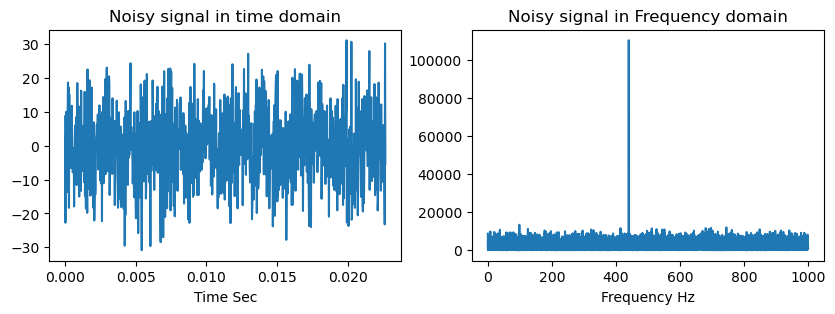

In [4]:
# create noisy signal
signalCombo = signal440 + noise*100

# transform signal to frequency domain
signalComboFFT = ft.rfft(signalCombo)

# compute frequencies for x-axis
freq = ft.rfftfreq(signalCombo.size, 1/sampleRate)

# show signal in frequency domian
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(t[0:1000], signalCombo[0:1000])
plt.title('Noisy signal in time domain')
plt.xlabel('Time Sec')
plt.subplot(1,2,2)
plt.title('Noisy signal in Frequency domain')
plt.plot(freq[0:10000], np.abs(signalComboFFT)[0:10000])
_=plt.xlabel('Frequency Hz')

Determine location (array-index) of the desired signal in the frequncy domain, then
zero out amplitude of all frequencies in the fft other than the desired signal

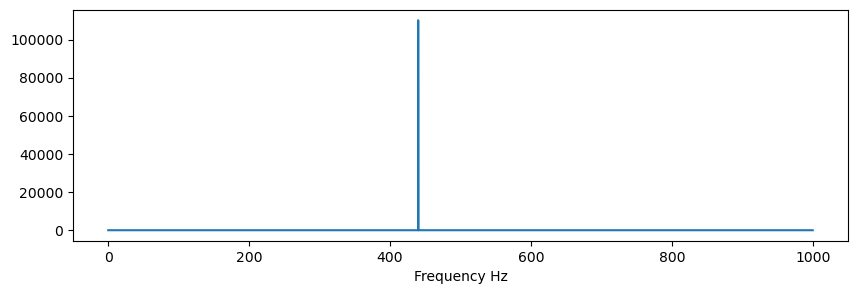

In [5]:
Signalidx = np.abs(signalComboFFT) > 40000
filteredFFT = np.zeros(signalComboFFT.size)
filteredFFT[Signalidx] = signalComboFFT[Signalidx]
plt.figure(figsize=(10,3))
plt.plot(freq[0:10000], np.abs(filteredFFT)[0:10000])
_=plt.xlabel('Frequency Hz')

---

> **Take inverse fft of the fillterd signal**

---

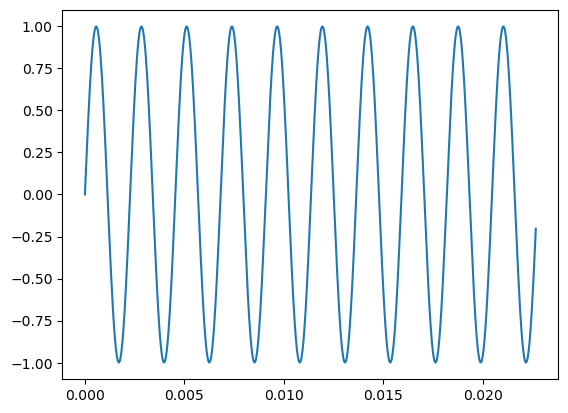

In [6]:
sigFiltered = ft.irfft(filteredFFT)
_=plt.plot(t[0:1000], sigFiltered[0:1000])

<speak>
    <audio src="https://intro.mp3"/>
    Welcome back.
</speak>


<speak>
    <audio src="https://intro.mp3"/>
    Welcome back.
</speak>